# Import Library

In [23]:
!pip install tensorflow==2.12.0 transformers==4.28.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing install

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [25]:
data = pd.read_csv('Note Indonesia.csv', sep=(','))
data

,Note,Sentiment
0,Hari ini saya sangat senang karena berhasil me...,Positif
1,Cuaca hari ini sangat panas dan saya merasa ti...,Negatif
2,Pagi ini saya sarapan dengan roti dan teh.,Netral
3,Saya merasa stres karena banyak tugas yang har...,Negatif
4,Berolahraga pagi membuat saya merasa segar dan...,Positif
...,...,...
824,Menonton film di bioskop bersama teman-teman s...,Positif
825,Bermain game online di rumah di malam hari. M...,Positif
826,Menerima pujian dari atasan atas hasil kerja y...,Positif
827,Merasa stres karena banyaknya deadline pekerja...,Negatif


# Exploratory Data Analysis (EDA)

In [26]:
data.isnull().sum()

Note         0
Sentiment    0
dtype: int64

In [27]:
data.duplicated().sum()

324

In [28]:
data.drop_duplicates(inplace=True)

In [29]:
data.shape

(505, 2)

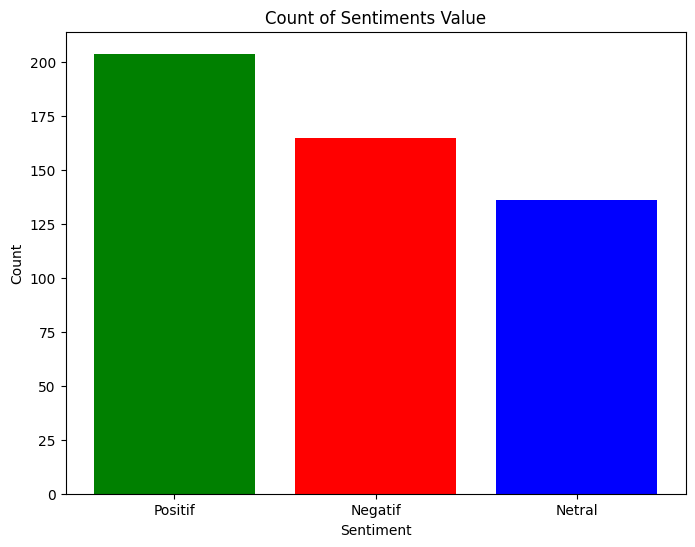

In [30]:
# Visualization of Sentiments Value
sentiment_counts = data['Sentiment'].value_counts()
sentiments = sentiment_counts.index
counts = sentiment_counts.values
plt.figure(figsize=(8, 6))
plt.bar(sentiments, counts, color=['green', 'red', 'blue'])
plt.title('Count of Sentiments Value')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
note = data.drop(columns=['Sentiment'])
labels = data['Sentiment']

# Preprocessing Data

## Cleaning Data

In [32]:
import re

def clean_notes(note):
    # Remove @ sign
    note = re.sub(r"@[A-Za-z0-9_]+", "", note)
    # Remove http links
    note = re.sub(r"http\S+|www\S+|https\S+", "", note, flags=re.MULTILINE)
    # Remove extra spaces
    note = " ".join(note.split())
    # Define emoji pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    # Remove Emojis
    note = emoji_pattern.sub(r'', note)
    # Remove hashtag sign but keep the text
    note = note.replace("#", "").replace("_", " ")
    # Remove numbers
    note = re.sub(r'\d+', '', note)
    # Remove punctuation (optional)
    note = re.sub(r'[^\w\s]', '', note)
    # Convert to lowercase
    note = note.lower()
    return note

In [33]:
# Apply the clean_notes function to the 'note' column
note['Note'] = note['Note'].apply(lambda x: clean_notes(x))
note

,Note
0,hari ini saya sangat senang karena berhasil me...
1,cuaca hari ini sangat panas dan saya merasa ti...
2,pagi ini saya sarapan dengan roti dan teh
3,saya merasa stres karena banyak tugas yang har...
4,berolahraga pagi membuat saya merasa segar dan...
...,...
824,menonton film di bioskop bersama temanteman se...
825,bermain game online di rumah di malam hari mer...
826,menerima pujian dari atasan atas hasil kerja y...
827,merasa stres karena banyaknya deadline pekerja...


## Handing Slang Words

In [34]:
!pip install indonlp==0.2.0

In [35]:
from indoNLP.preprocessing import replace_slang

def handle_slang_in_text(dataframe, column_name):
    # Copy DataFrame to avoid in-place modification
    dataframe_copy = dataframe.copy()

    # Use the replace_slang function on each value in a text column
    dataframe_copy[column_name] = dataframe_copy[column_name].apply(lambda text: ' '.join(replace_slang(word) for word in text.split()))

    return dataframe_copy

# Example of using the function to handle slang words in the 'Note' column of a DataFrame
dataframe_without_slang = handle_slang_in_text(note, 'Note')
dataframe_without_slang

,Note
0,hari ini saya sangat senang karena berhasil me...
1,cuaca hari ini sangat panas dan saya merasa ti...
2,pagi ini saya sarapan dengan roti dan teh
3,saya merasa stres karena banyak tugas yang har...
4,berolahraga pagi membuat saya merasa segar dan...
...,...
824,menonton film di bioskop bersama temanteman se...
825,bermain game online di rumah di malam hari mer...
826,menerima pujian dari atasan atas hasil kerja y...
827,merasa stres karena banyaknya deadline pekerja...


## Stemming Data

In [36]:
!pip install Sastrawi

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

def stemming_indonesian(dataframe_without_slang):
    # Create a stemming object from Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # Tokenization
    word_tokens = word_tokenize(dataframe_without_slang)
    # stemming words
    stemming_text = [stemmer.stem(word) for word in word_tokens]
    return " ".join(stemming_text)

# Create a new DataFrame for the stemming result
dataframe_stemming = pd.DataFrame()

# Stemming each text in the 'Note' column of the original DataFrame
dataframe_stemming['Note'] = dataframe_without_slang['Note'].apply(stemming_indonesian)
dataframe_stemming

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Note
0,hari ini saya sangat senang karena hasil seles...
1,cuaca hari ini sangat panas dan saya rasa tida...
2,pagi ini saya sarap dengan roti dan teh
3,saya rasa stres karena banyak tugas yang harus...
4,olahraga pagi buat saya rasa segar dan tenaga
...,...
824,tonton film di bioskop sama temanteman telah p...
825,main game online di rumah di malam hari rasa s...
826,terima puji dari atas atas hasil kerja yang ba...
827,rasa stres karena banyak deadline kerja dan ba...


In [38]:
max_length = 0
longest_sentence = ""
sentence_index = -1

for index, sentence in enumerate(dataframe_stemming['Note']):
    length = len(sentence.split())
    if length > max_length:
        max_length = length
        longest_sentence = sentence
        sentence_index = index

print("Longest sentence:")
print(longest_sentence)
print("Length:", max_length)
print("Found in line:", sentence_index)

Longest sentence:
aku makan junk food seperti burger dan kentang goreng untuk makan malam aku rasa salah karena makan makan yang tidak sehat aku tahu bahwa junk food dapat bahaya sehat tetapi aku tidak bisa tahan goda aku perlu usaha untuk lebih disiplin dalam jaga pola makan
Length: 45
Found in line: 443


In [39]:
def map_sentiment_labels(labels):
    if labels == 'Positif':
        return 2
    elif labels == 'Netral':
        return 1
    elif labels == 'Negatif':
        return 0
    else:
        return None  # Return None if label not valid

labels_data = pd.DataFrame()
labels_data['Label'] = data['Sentiment'].apply(map_sentiment_labels)
labels_data

,Label
0,2
1,0
2,1
3,0
4,2
...,...
824,2
825,2
826,2
827,0


In [17]:
# Concat Dataframe
df = pd.concat([dataframe_stemming, labels_data], axis=1)
df

,Note,Label
0,hari ini saya sangat senang karena hasil seles...,2
1,cuaca hari ini sangat panas dan saya rasa tida...,0
2,pagi ini saya sarap dengan roti dan teh,1
3,saya rasa stres karena banyak tugas yang harus...,0
4,olahraga pagi buat saya rasa segar dan tenaga,2
...,...,...
824,tonton film di bioskop sama temanteman telah p...,2
825,main game online di rumah di malam hari rasa s...,2
826,terima puji dari atas atas hasil kerja yang ba...,2
827,rasa stres karena banyak deadline kerja dan ba...,0


In [40]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

Training data shape: (404, 2)
Validation data shape: (50, 2)
Test data shape: (51, 2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


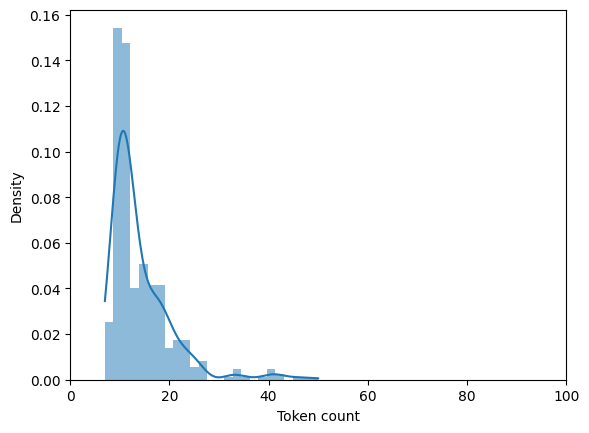

In [41]:
# Split Data
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

# Visualize token lengths
token_lens = []
for txt in df['Note']:
    tokens = bert_tokenizer.encode(txt)
    token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100])
plt.xlabel('Token count')
plt.show()

# Create a function to combine tokenization steps
def convert_example_to_feature(sentence, max_length=max_length):
    return bert_tokenizer.encode_plus(
        sentence,
        add_special_tokens=True,
        padding='max_length',
        truncation='longest_first',
        max_length=45,
        return_attention_mask=True,
        return_token_type_ids=True
    )

# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
        "input_ids": input_ids,
        "token_type_ids": token_type_ids,
        "attention_mask": attention_masks,
    }, label

# Create a function to iterate or encode each sentence in the entire data
def encode(data, max_length=max_length):
    input_ids_list = []
    token_type_ids_list = []
    attention_mask_list = []
    label_list = []

    for sentence, label in data.to_numpy():
        bert_input = convert_example_to_feature(sentence, max_length)
        input_ids_list.append(bert_input['input_ids'])
        token_type_ids_list.append(bert_input['token_type_ids'])
        attention_mask_list.append(bert_input['attention_mask'])
        label_list.append(label)
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [42]:
from tensorflow.keras.regularizers import l2

# Load model
model_name = 'indobenchmark/indobert-base-p2'

bert_model = TFBertForSequenceClassification.from_pretrained(
    model_name,
    num_labels=3,
    hidden_dropout_prob=0.3,  # Increase the dropout rate for the hidden layer
    attention_probs_dropout_prob=0.3  # Increase the dropout rate for attention probabilities
)

# Add L2 regularization to all dense layers in the model
for layer in bert_model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        layer.kernel_regularizer = l2(0.01)

# Compile model with optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)

bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
# Train Model
history = bert_model.fit(
    train_encoded,
    validation_data=val_encoded,
    epochs=5,
    batch_size=32
)

Epoch 1/5
13/13 [==============================] - 259s 17s/step - loss: 0.9371 - accuracy: 0.5718 - val_loss: 0.6877 - val_accuracy: 0.7400
Epoch 2/5
13/13 [==============================] - 212s 16s/step - loss: 0.4391 - accuracy: 0.8564 - val_loss: 0.5245 - val_accuracy: 0.8400
Epoch 3/5
13/13 [==============================] - 215s 16s/step - loss: 0.2346 - accuracy: 0.9208 - val_loss: 0.6055 - val_accuracy: 0.8200
Epoch 4/5
13/13 [==============================] - 214s 17s/step - loss: 0.1536 - accuracy: 0.9505 - val_loss: 0.3701 - val_accuracy: 0.8800
Epoch 5/5
13/13 [==============================] - 215s 17s/step - loss: 0.1487 - accuracy: 0.9579 - val_loss: 0.3601 - val_accuracy: 0.9000


2/2 [==============================] - 8s 4s/step - loss: 0.2289 - accuracy: 0.9412
Loss: 0.22889122366905212, Accuracy: 0.9411764740943909


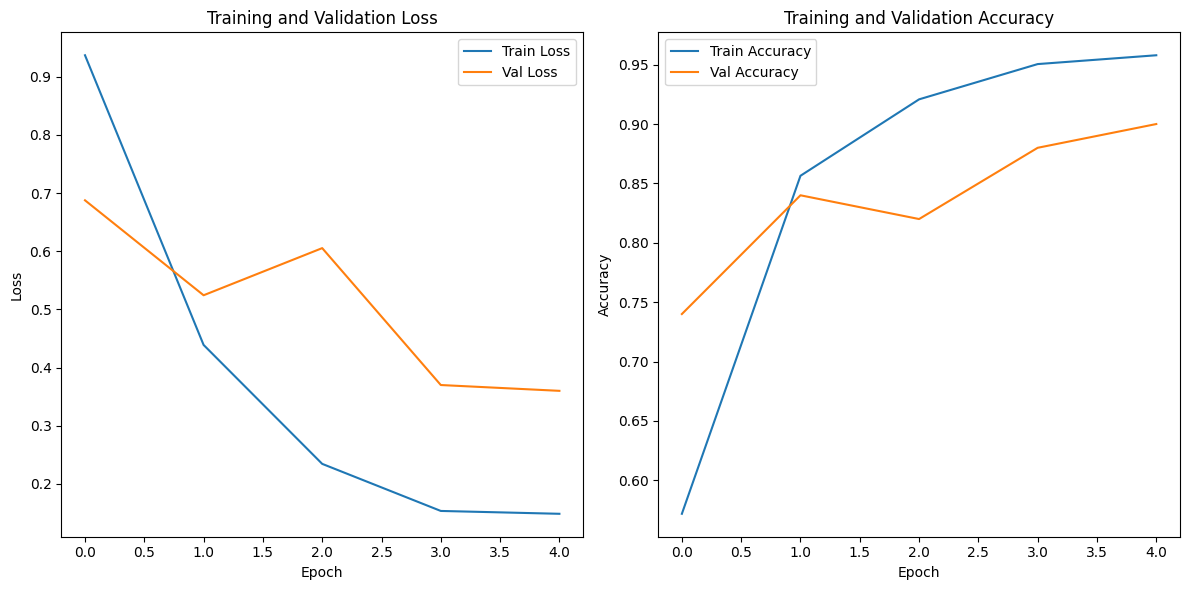

In [44]:
# Evaluation Model
loss, accuracy = bert_model.evaluate(test_encoded)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Visualize compare train loss and val loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Visualize compare train accuracy and val accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
def test_model_bert(model, tokenizer, text, max_length=45):
    # Input text tokenization
    input_ids = tokenizer.encode_plus(text, max_length=max_length, truncation=True, padding='max_length', return_tensors="tf")

    # Sentiment prediction using model
    predictions = model.predict([input_ids['input_ids'], input_ids['attention_mask'], input_ids['token_type_ids']])

    # Take the label with the highest probability as the prediction result
    predicted_label = tf.argmax(predictions[0], axis=-1).numpy()

    return predicted_label

In [47]:
# Example manual input
manual_text = "Saya akan menonton film di bioskop akhir pekan ini."

# Test model with manual input
result = test_model_bert(bert_model, bert_tokenizer, manual_text)
print(f"Hasil Klasifikasi: {result}")

1/1 [==============================] - 0s 297ms/step
Hasil Klasifikasi: [1]


In [48]:
!pip install tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 23.0 MB/s eta 0:00:00


In [49]:
# Convert model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(bert_model)
tflite_model = converter.convert()

# Save model
with open("IndoBERT_model.tflite", "wb") as f:
    f.write(tflite_model)